In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

In [2]:
# Load the datasets from the assignment_1_data folder
path = "Assignment_02_data/"
files = [f for f in listdir(path) if isfile(join(path, f))]
gmls = [nx.read_gml(path + f) for f in files]

graphs = {k: v for k, v in zip(files, gmls)}

In [3]:
from networkx.algorithms.community import greedy_modularity_communities as greedy_modularity_algorithm, label_propagation_communities as label_propagation_algorithm


def draw_graph(dataset, G):
    # (a) Greedy Modularity Maximization
    greedy_communities = list(greedy_modularity_algorithm(G))

    # Create a mapping of node to community for coloring
    node_community_mapping = {}

    # Assign colors to nodes based on the community they belong to
    for i, community in enumerate(greedy_communities):
        for node in community:
            node_community_mapping[node] = i

    pos = nx.spring_layout(G)

    internal_edges = []
    external_edges = []
    for edge in G.edges():
        if node_community_mapping[edge[0]] == node_community_mapping[edge[1]]:
            internal_edges.append(edge)
        else:
            external_edges.append(edge)
    plt.figure(figsize=(30,10))
    plt.subplot(1,2,1)
    nx.draw_networkx_nodes(G, pos, node_color=[node_community_mapping[node] for node in G.nodes()], cmap=plt.cm.rainbow)
    nx.draw_networkx_edges(G, pos, edgelist=internal_edges, edge_color='black')
    nx.draw_networkx_edges(G, pos, edgelist=external_edges, edge_color='lightgray')
    plt.title("Greedy Modularity Maximization")

    # (b) Label Propagation Algorithm
    label_communities = list(label_propagation_algorithm(G))

    node_community_mapping = {}

    for i, community in enumerate(label_communities):
        for node in community:
            node_community_mapping[node] = i

    pos = nx.spring_layout(G)

    internal_edges = []
    external_edges = []
    for edge in G.edges():
        if node_community_mapping[edge[0]] == node_community_mapping[edge[1]]:
            internal_edges.append(edge)
        else:
            external_edges.append(edge)
    plt.subplot(1,2,2)
    nx.draw_networkx_nodes(G, pos, node_color=[node_community_mapping[node] for node in G.nodes()], cmap=plt.cm.rainbow)
    nx.draw_networkx_edges(G, pos, edgelist=internal_edges, edge_color='black')
    nx.draw_networkx_edges(G, pos, edgelist=external_edges, edge_color='lightgray')
    plt.title("Label Propagation Algorithm")
    plt.suptitle(dataset)

    plt.show()
    return greedy_communities, label_communities

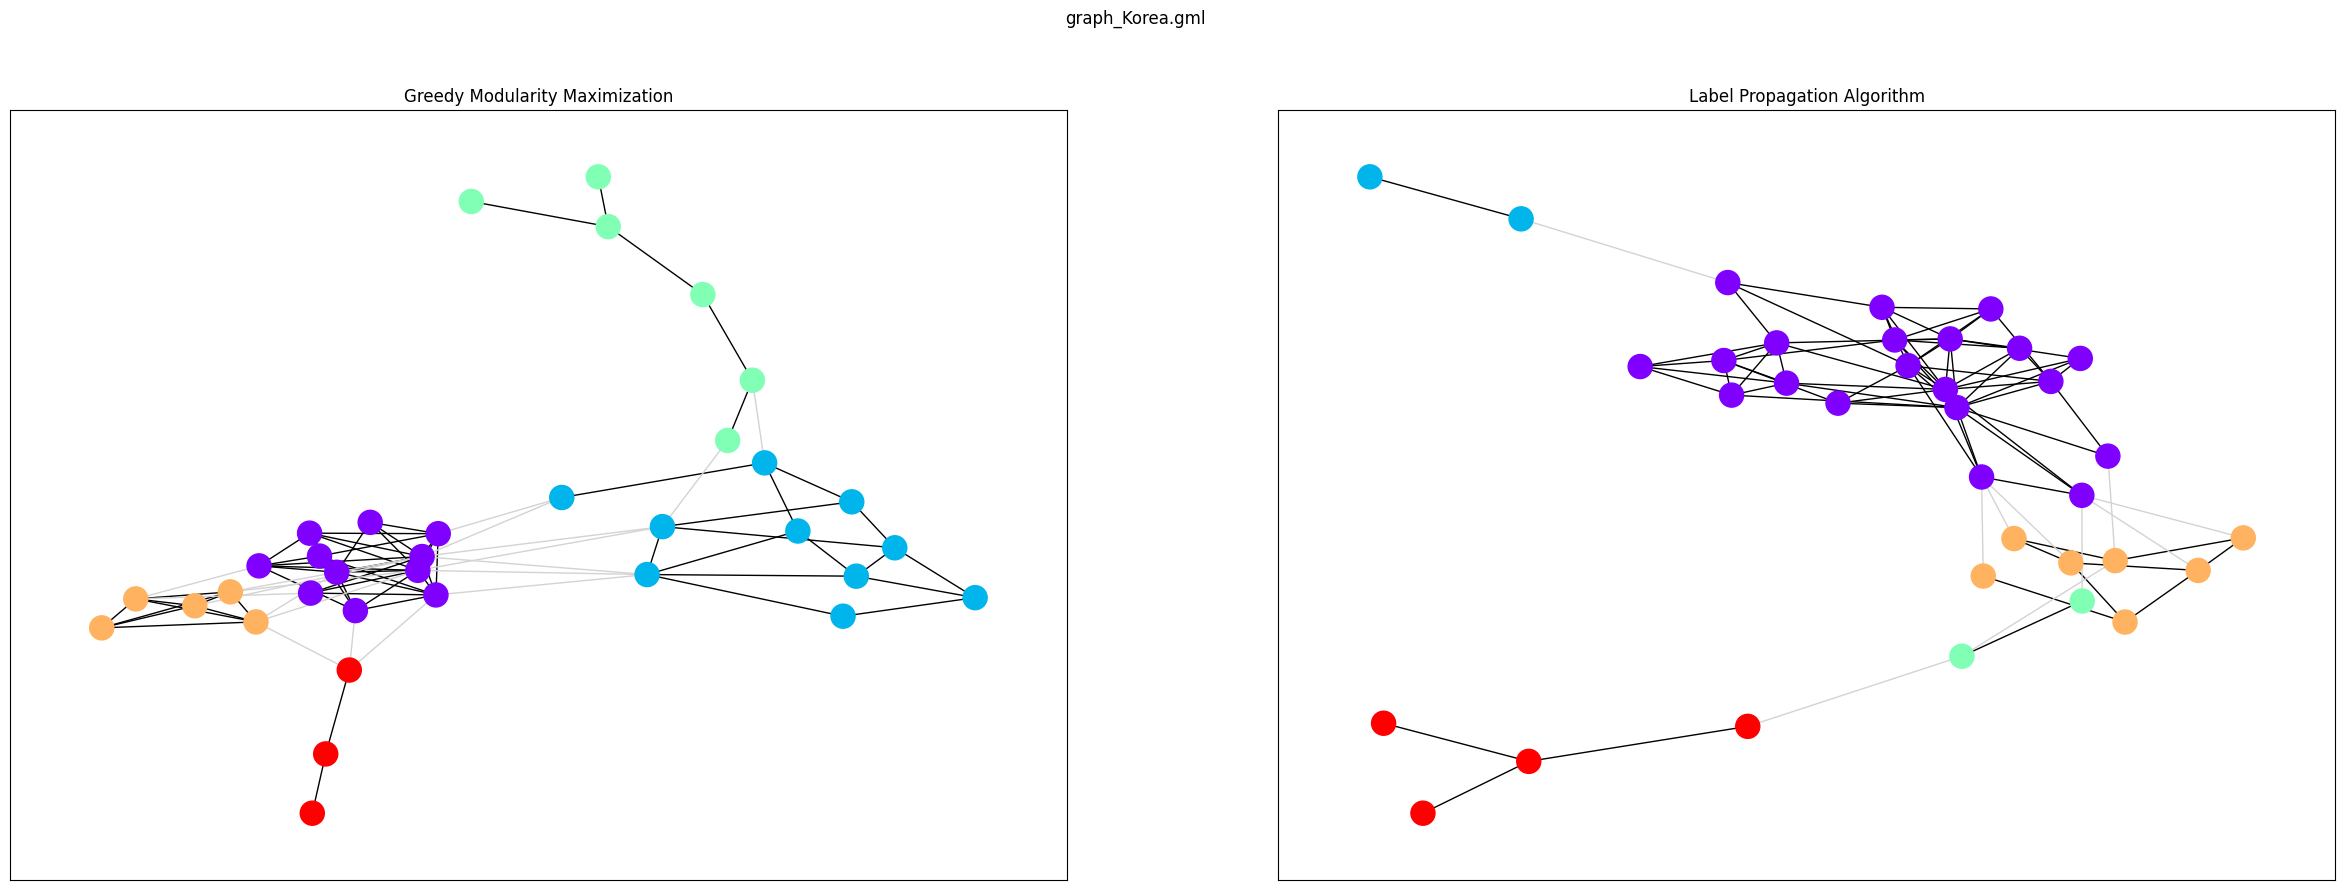

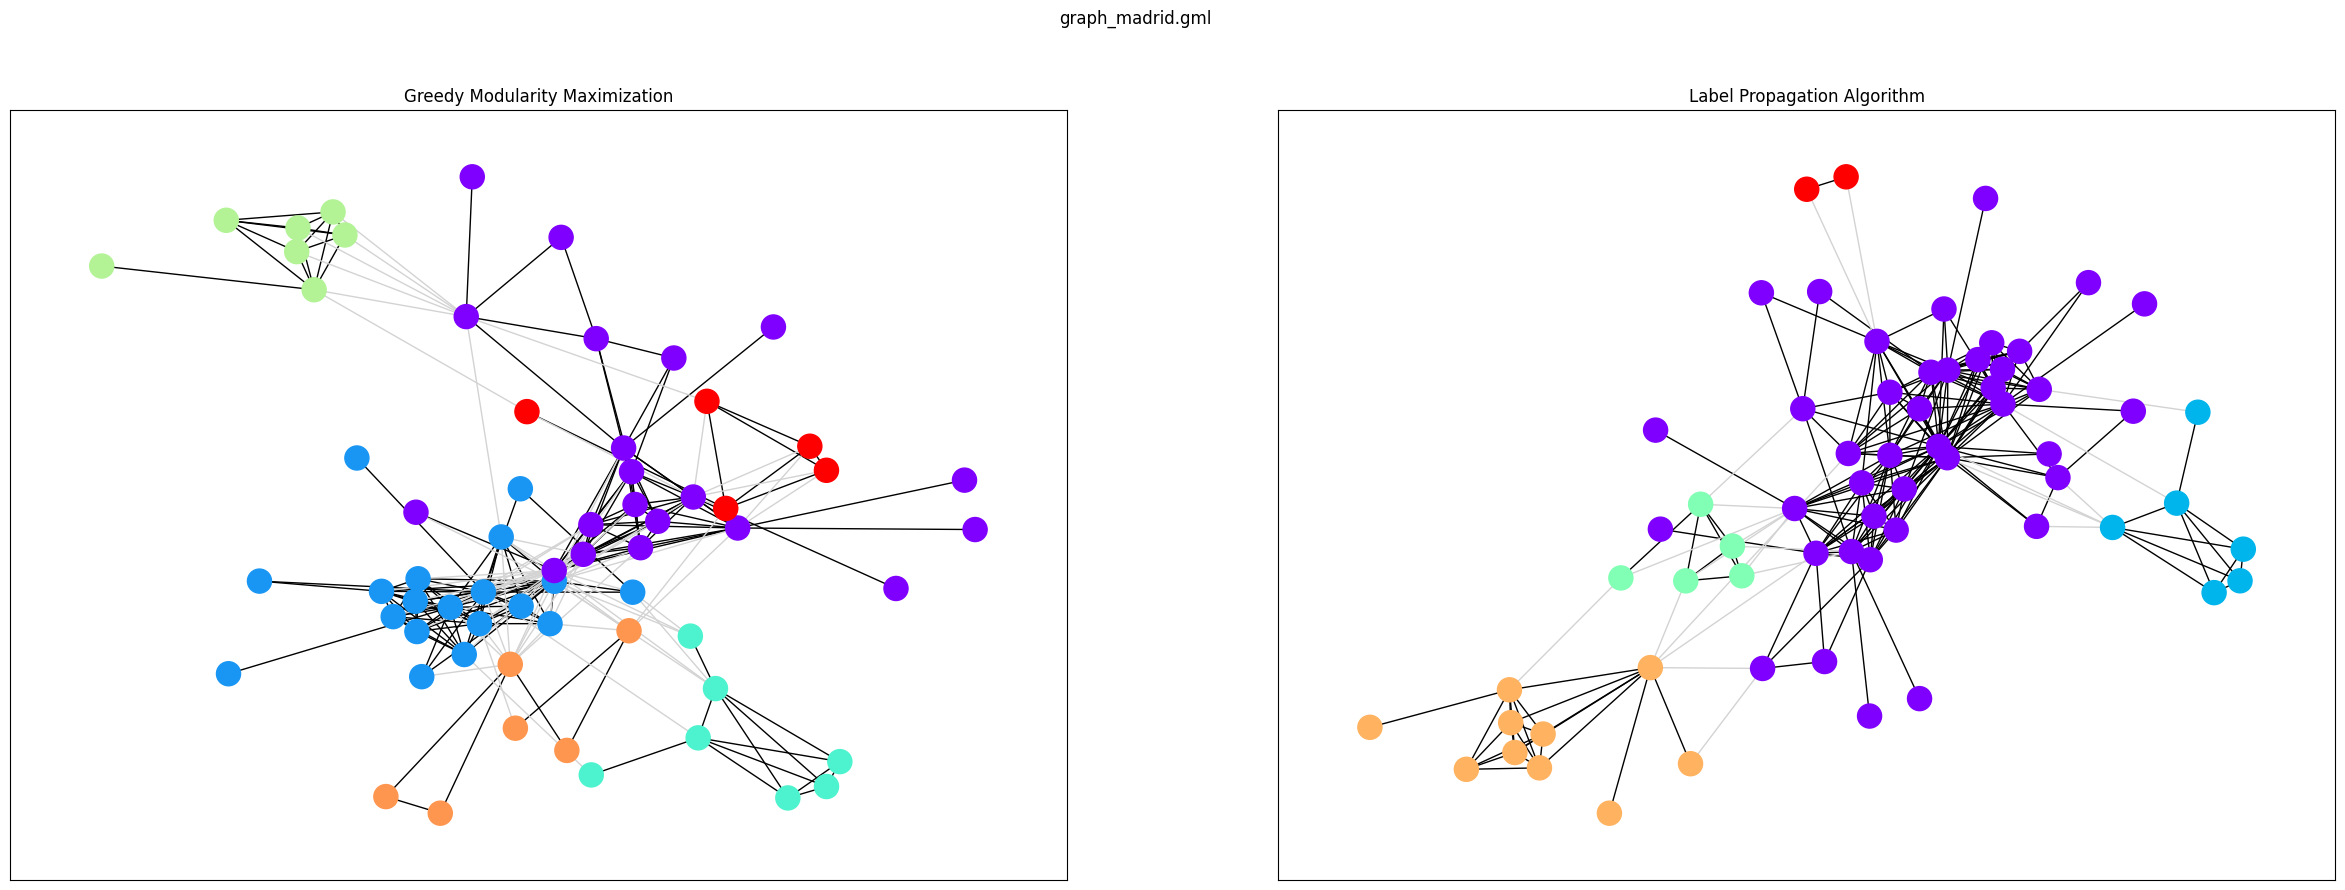

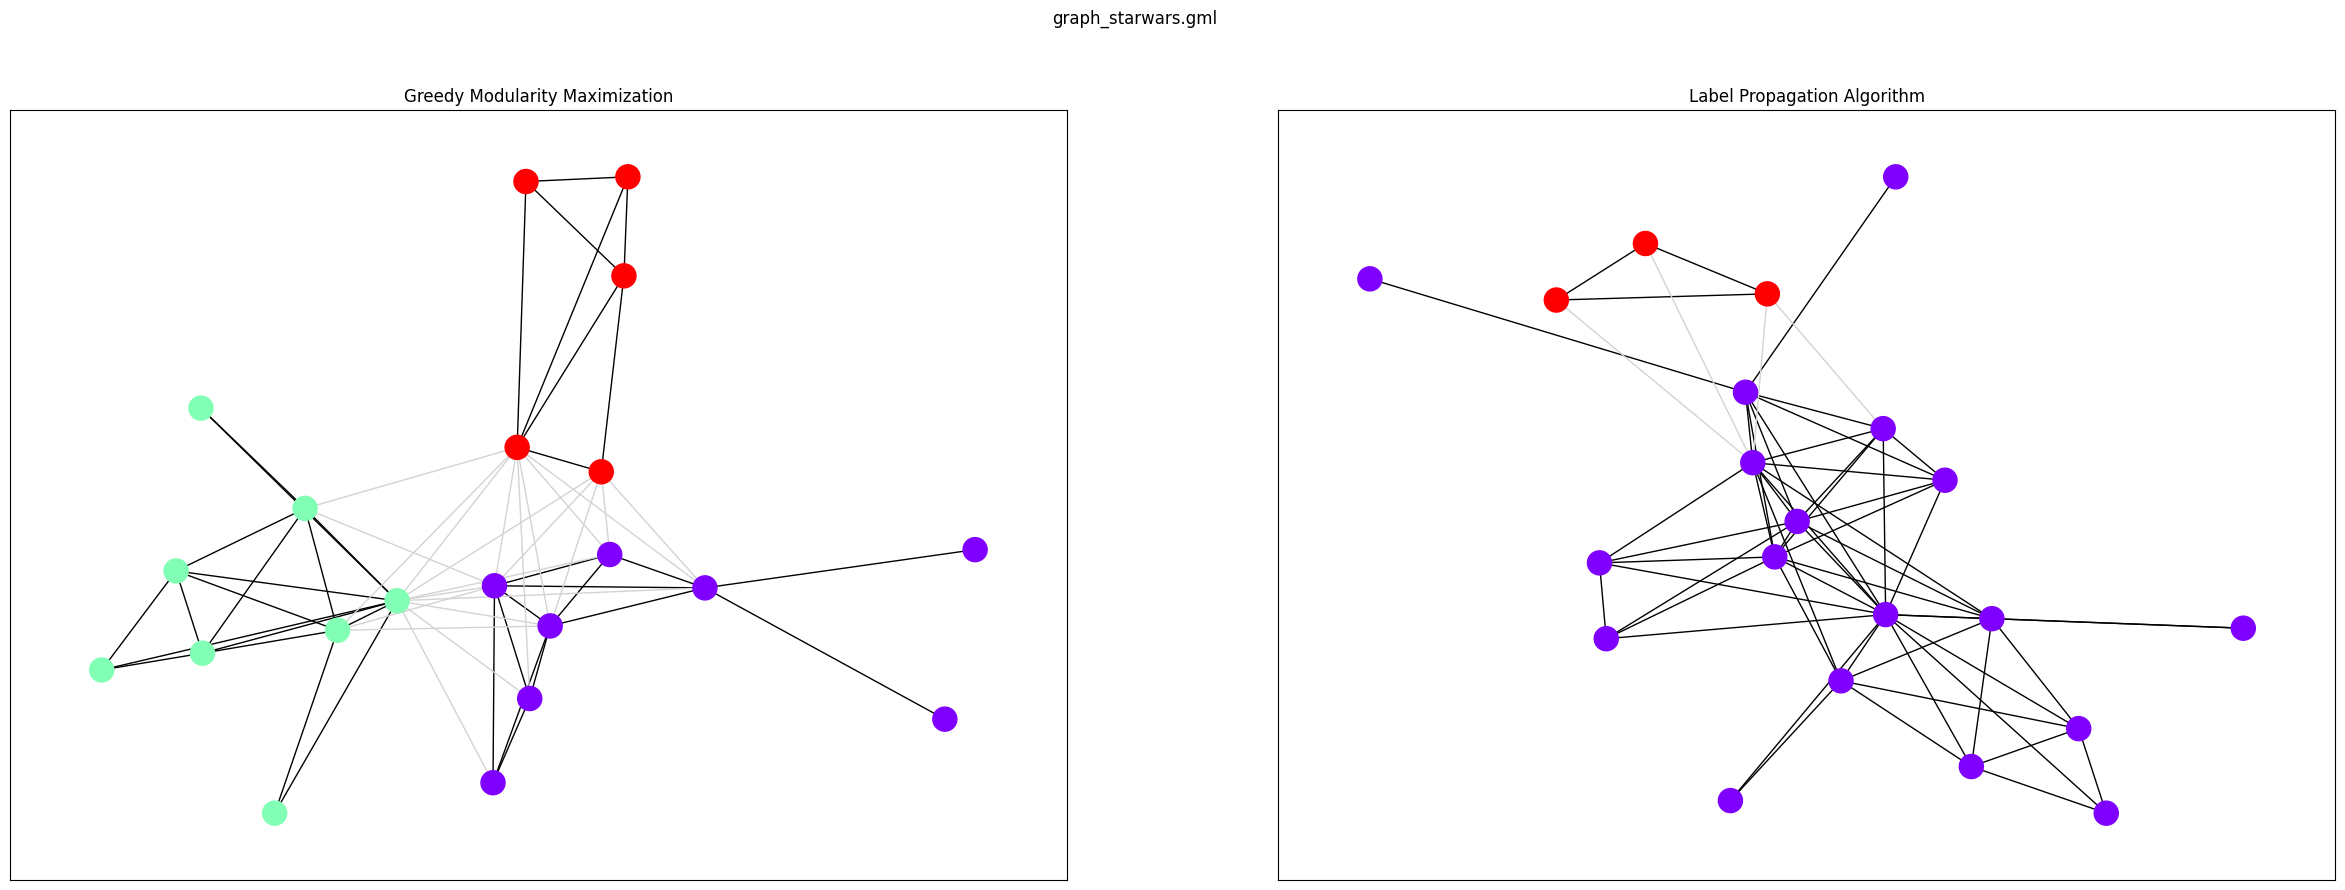

In [4]:
orig_greedy_modularity_communities = {}
orig_label_propagation_communities = {}

for dataset, G in graphs.items():
    greedy_communities, label_communities = draw_graph(dataset, G)
    orig_greedy_modularity_communities[dataset] = greedy_communities
    orig_label_propagation_communities[dataset] = label_communities

In [5]:
randomised_graphs = {dataset: nx.algorithms.smallworld.random_reference(G=G, niter=1, connectivity=False, seed=1337) for dataset, G in graphs.items()}

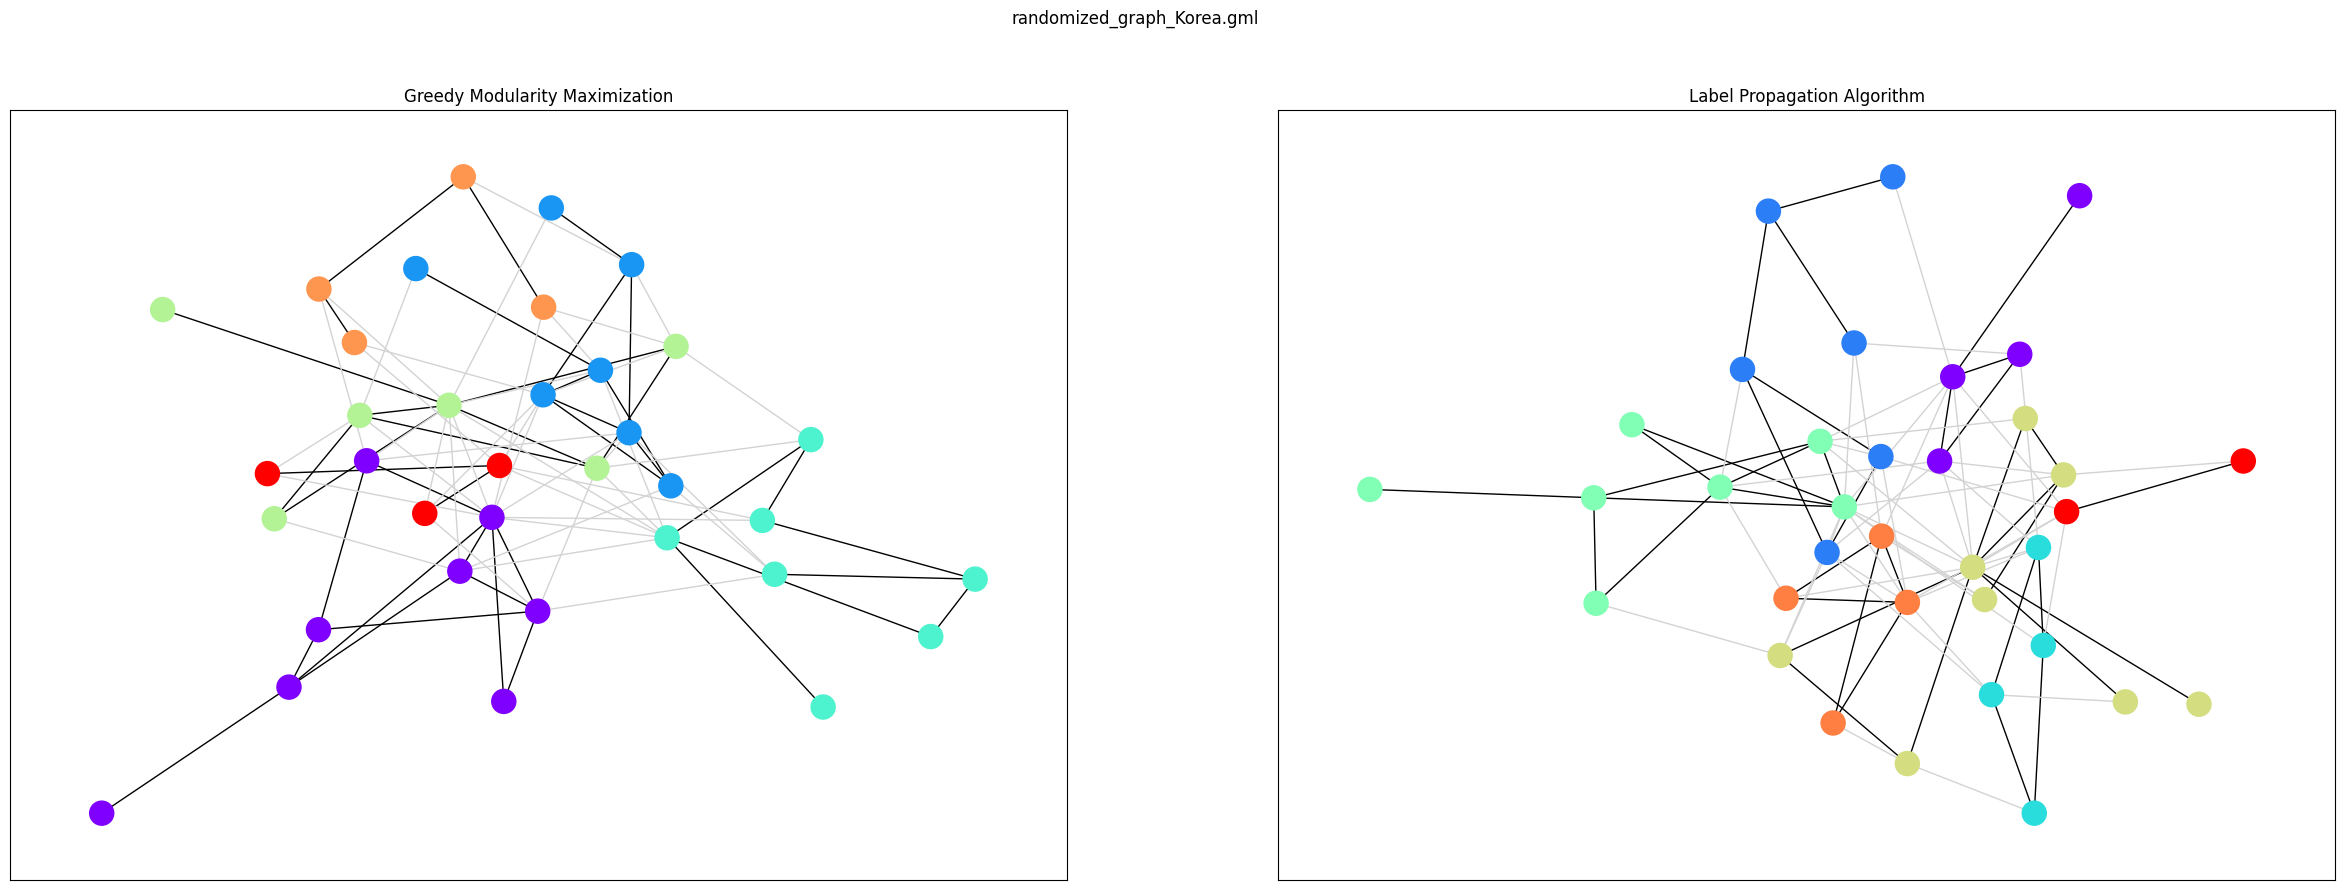

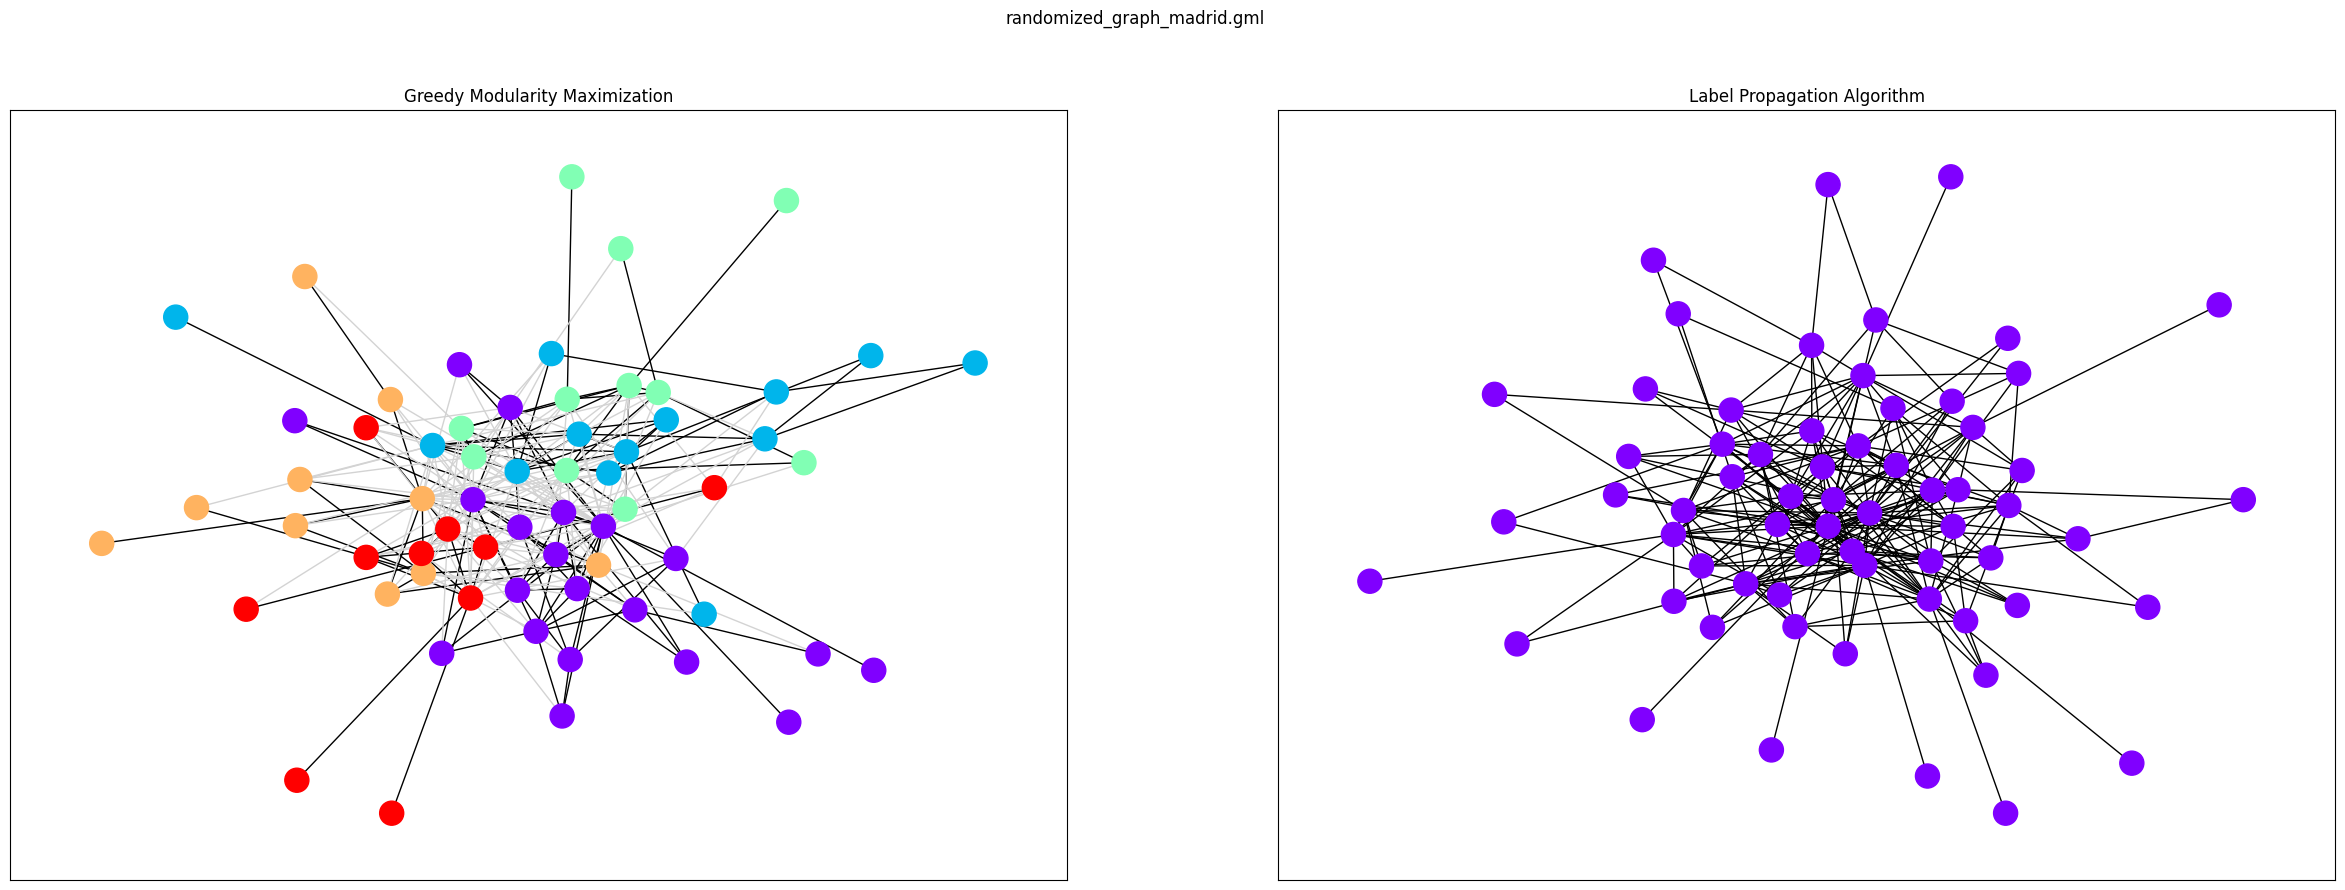

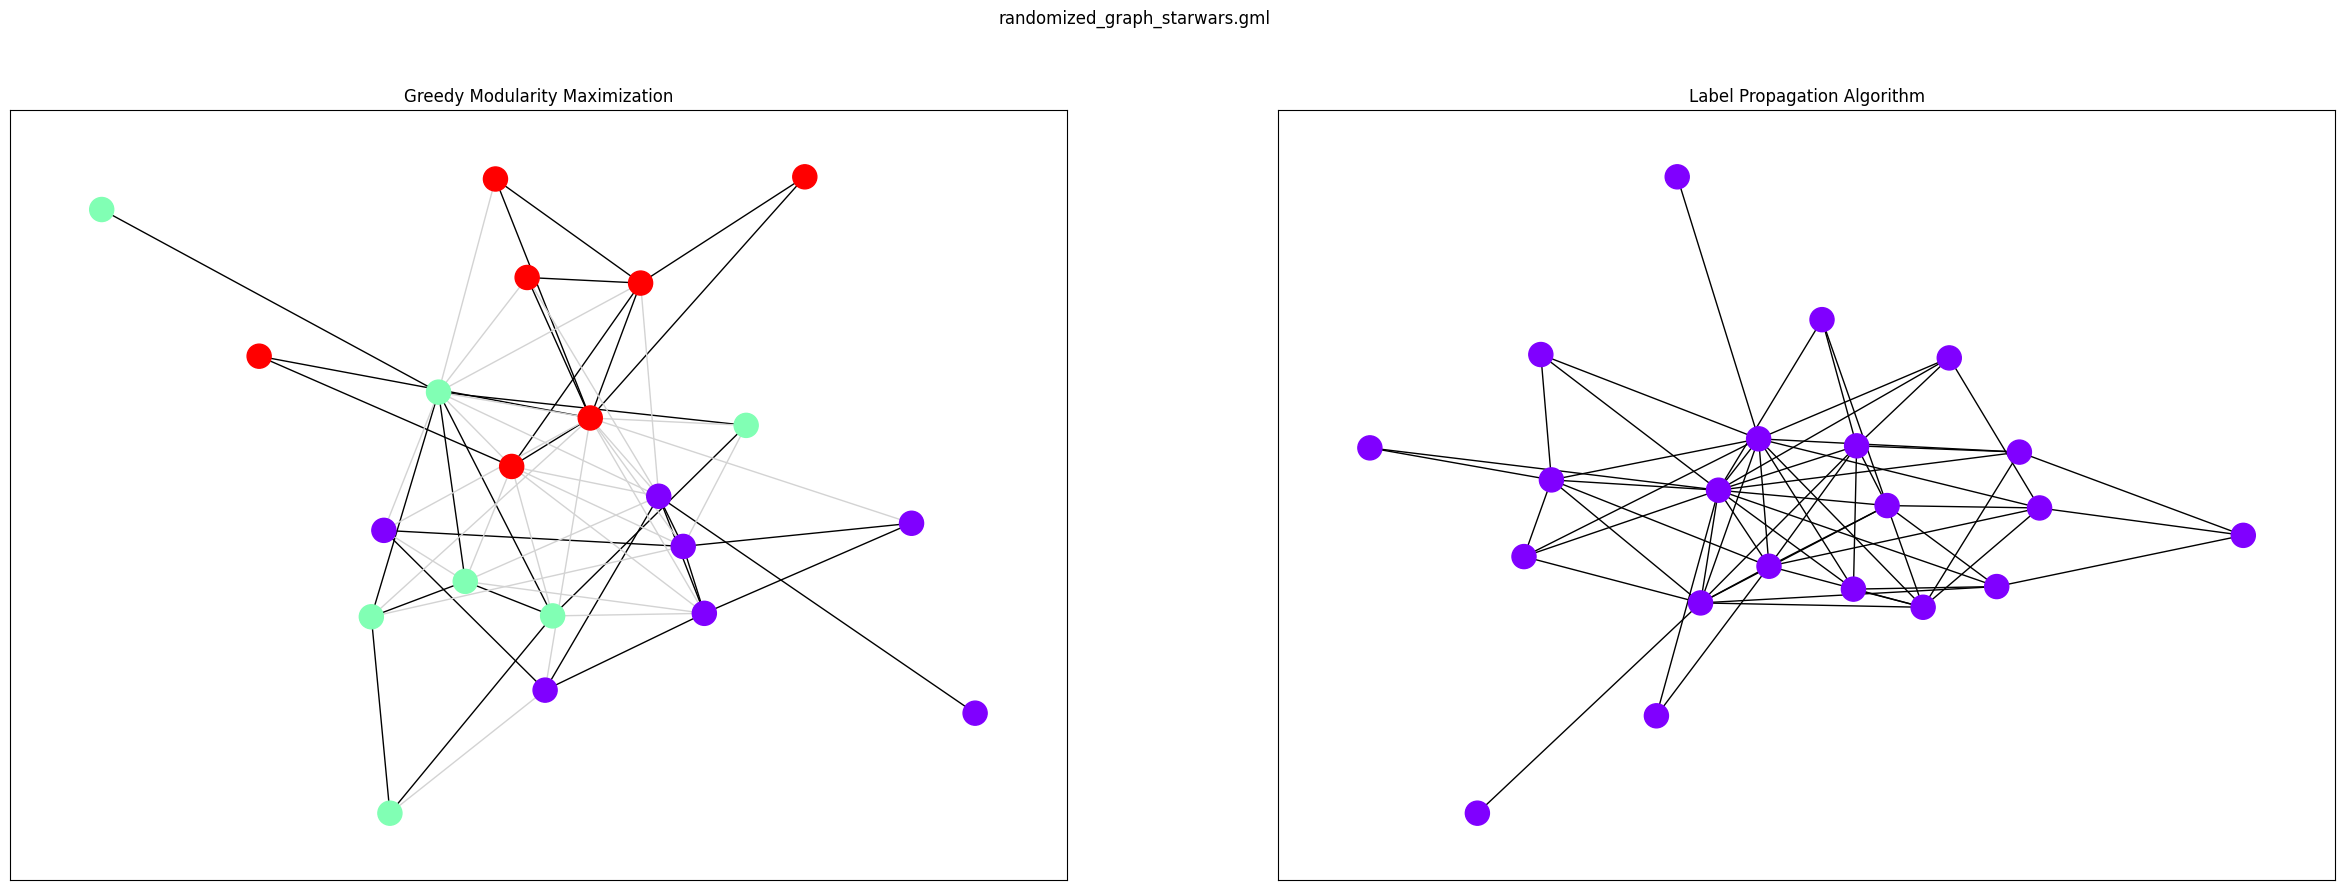

In [6]:
# Randomise each network and repeat the exercise at point (1).

rand_greedy_modularity_communities = {}
rand_label_propagation_communities = {}

for dataset, G in randomised_graphs.items():
    greedy_communities, label_communities = draw_graph("randomized_" + dataset, G)
    rand_greedy_modularity_communities[dataset] = greedy_communities
    rand_label_propagation_communities[dataset] = label_communities

In [7]:
# Compare the number of communities obtained before and after randomisation and the quality of community detection before and afterrandomisation

for dataset in graphs:
    print()
    print(f"number of orig_greedy_modularity_communities[{dataset}]: " + str(len(orig_greedy_modularity_communities[dataset])))
    print(f"number of rand_greedy_modularity_communities[{dataset}]: " + str(len(rand_greedy_modularity_communities[dataset])))
    print()
    print(f"number of orig_label_propagation_communities[{dataset}]: " + str(len(orig_label_propagation_communities[dataset])))
    print(f"number of rand_label_propagation_communities[{dataset}]: " + str(len(rand_label_propagation_communities[dataset])))
    print()


number of orig_greedy_modularity_communities[graph_Korea.gml]: 5
number of rand_greedy_modularity_communities[graph_Korea.gml]: 6

number of orig_label_propagation_communities[graph_Korea.gml]: 5
number of rand_label_propagation_communities[graph_Korea.gml]: 7


number of orig_greedy_modularity_communities[graph_madrid.gml]: 6
number of rand_greedy_modularity_communities[graph_madrid.gml]: 5

number of orig_label_propagation_communities[graph_madrid.gml]: 5
number of rand_label_propagation_communities[graph_madrid.gml]: 1


number of orig_greedy_modularity_communities[graph_starwars.gml]: 3
number of rand_greedy_modularity_communities[graph_starwars.gml]: 3

number of orig_label_propagation_communities[graph_starwars.gml]: 2
number of rand_label_propagation_communities[graph_starwars.gml]: 1



In [13]:
for i in range(0, 3):
    print(f"modularity quality of orig_greedy_modularity_communities[{files[i]}]: " + str(nx.community.quality.modularity(graphs[files[i]],orig_greedy_modularity_communities[files[i]])))
    print(f"modularity quality of rand_greedy_modularity_communities[{files[i]}]: " + str(nx.community.quality.modularity(randomised_graphs[files[i]],rand_greedy_modularity_communities[files[i]])))
    print()

for i in range(0, 3):
    print(f"modularity quality of orig_label_propagation_communities[{files[i]}]: " + str(nx.community.quality.modularity(graphs[files[i]],orig_label_propagation_communities[files[i]])))
    print(f"modularity quality of rand_label_propagation_communities[{files[i]}]: " + str(nx.community.quality.modularity(randomised_graphs[files[i]],rand_label_propagation_communities[files[i]])))
    print()


modularity quality of orig_greedy_modularity_communities[graph_Korea.gml]: 0.44706632653061223
modularity quality of rand_greedy_modularity_communities[graph_Korea.gml]: 0.2949971655328798

modularity quality of orig_greedy_modularity_communities[graph_madrid.gml]: 0.4102863723348406
modularity quality of rand_greedy_modularity_communities[graph_madrid.gml]: 0.23461023895408903

modularity quality of orig_greedy_modularity_communities[graph_starwars.gml]: 0.28708333333333336
modularity quality of rand_greedy_modularity_communities[graph_starwars.gml]: 0.18277777777777776

modularity quality of orig_label_propagation_communities[graph_Korea.gml]: 0.2604875283446712
modularity quality of rand_label_propagation_communities[graph_Korea.gml]: 0.29861111111111105

modularity quality of orig_label_propagation_communities[graph_madrid.gml]: 0.2872529594065946
modularity quality of rand_label_propagation_communities[graph_madrid.gml]: 1.1102230246251565e-16

modularity quality of orig_label_pro